## Correlated Fitting of data with Jack-knife
This is the current version I am working with for writing a code for the correlated fitting. This version asssumes that the blocking length for the stable largest error is known.

In [1]:
#!/usr/bin/env python3
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import interp1d
import pylab
import sys
import csv
import pandas as pd
import random
import jackknife_utilities
import plotter_utilities
import numerical_utilities
from scipy.stats import chi2
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#np.set_printoptions(threshold=sys.maxsize)

In [2]:
def func1(x,A,B,Delta):
    return A*x**(-Delta)+B
def func2(x,A,B,Delta):
    return A*np.exp(-Delta*x)+B
def func3(x,A,B,Delta):
    return A*np.exp(-Delta*np.sqrt(x) ) +B

def plotbase(del_r,jkavg,jkerr,tag):
    plt.errorbar(del_r,jkavg,yerr=jkerr,
     c='k', fmt='x', markersize='5', elinewidth=1,capsize=5)
    #plt.rcParams["figure.figsize"] = (10,10)

    plt.xlabel(r'$(1-\cos(\theta) ) $', fontsize=30)
    plt.ticklabel_format(useOffset=False)
    #plt.ylabel(r'$ \log C(\theta)$', fontsize=16)
    plt.yscale('log')
    plt.xscale('log')
    plt.annotate(r'$\mathrm{T}$=%s' %(T), xy=(0.4,0.9),xycoords='axes fraction',fontsize=30 )
    plt.ylabel(r'$ C(\theta)$', fontsize=30)
    #plt.xlim([0.2,1])
    #plt.ylim([0.05,0.08])
    plt.savefig("analysis.logscale2.CvsX.T."+T+"."+tag+".png",bbox_inches='tight')
    #plt.show()
    plt.close()

Returned probability data is stored below in an 2D array named Plog. Data for each row comes from seperate configurations. Thus data in each column indicate return probability at a praticular step $\sigma$.


In [3]:
######## main parameters ##########################
VOL='1062'
T='2.7'
p01=1
p02=0.1
p03=0.25
str3="../data/corr.Lbv"+VOL+".T"+T  # i/p file: two column format: ln(\sigma)    ln(P)

X=np.array(pd.read_csv(str3,index_col=False,header=None,sep='\s+') )
A=X[:,0]
rc=X[:,1]

fit_start=2
fit_end=17
dp=20
r_length=int(int(VOL)/2) +1
omit_data_from_end=0
cutoff=r_length-omit_data_from_end
print("check rlength at config file: rlength=",r_length)
del_r=A[0:cutoff].astype(np.int32)
del_r= 1 - np.cos(del_r/float(VOL)*2*np.pi)
#print(del_rUB)
#quit()
config_length=len(rc)//r_length
print("saved from how many config?", config_length)
rc=rc.reshape(config_length,r_length)
rc=rc[:,0:cutoff]

#rc[:,0] *=2

#print(rc[10,:])

#rc= rc/(float(VOL)/2)

length_of_block=200
bin=len(rc[:,0])//length_of_block
rc=rc[0:bin*length_of_block,:]

print("Best bin=%d, block length/data in each bin=%d" %(length_of_block,bin))

check rlength at config file: rlength= 532
saved from how many config? 10000
Best bin=200, block length/data in each bin=50


In [4]:
# find jk avg and jkerror for the best jk case: of lnP vs lnSigma
print("dimension good?",del_r.shape,rc.shape)

binned_data=np.apply_along_axis(jackknife_utilities.binner ,0,rc,length_of_block)
average_data=np.apply_along_axis(jackknife_utilities.partial_average,0,binned_data)
#average_data.shape

#jkerr.shape
#np.mean(average_data,axis=0)
# #average_data[0,:]
# fig = plt.figure(facecolor="w")
# plt.plot(del_r,np.mean(average_data,axis=0),'^k',ms='5')
# #plt.yscale('log')
# #plt.xscale('log')
# plt.annotate(r'$\mathrm{T}$=%s' %(T), xy=(0.4,0.9),xycoords='axes fraction',fontsize=30 )
# plt.xlabel(r'$r$',fontsize=20)
# plt.ylabel(r'$\langle C(r) \rangle$',fontsize=20)
# plt.savefig("T"+T+".png",bbox_inches='tight')
# plt.show()
# plt.close()

#average_data[:,2]
#average_data[0,:]

dimension good? (532,) (10000, 532)


In [5]:


#x=np.arange(1,101).reshape((10,10))
#decimation4(x,3)

In [6]:


dp2=len(del_r)//dp

del_r_dec=del_r[0:dp2*dp]

del_r_dec=np.mean( del_r_dec.reshape( (dp2,dp) ), axis=1) # axis 1 sum over column data: rowwise sum: final dim=#of row
#del_r_dec

avg_dec=numerical_utilities.decimation4(average_data,dp)

avg_dec.shape
del_r_dec.shape

(50, 26)

(26,)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.1 µs


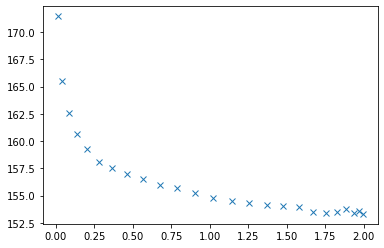

In [7]:
%time
#avg_dec[0,:]
#avg_dec[:,0]
plt.plot(del_r_dec[1:len(del_r_dec)],np.mean(avg_dec,axis=0)[1:len(del_r_dec)] ,'x') 
plt.show()
plt.close()

In [8]:
%time
jkavg=np.apply_along_axis(np.mean,0,avg_dec) # 0 for column-wise
#jkerr2=np.apply_along_axis(np.mean,0,jkerr2Darr) 
jkerr=np.apply_along_axis(jackknife_utilities.jack_error,0,avg_dec)

#jkerr=np.sqrt(jkerr1**2+jkerr2**2)

jkavg.shape,jkerr.shape

#jkavg
#jkerr
#len(del_r_dec)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.34 µs


((26,), (26,))

[  9.32420368 145.60745857   0.24109396]
[4.65232715 4.79529832 0.08532412]


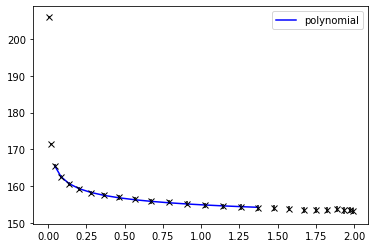

CPU times: user 94.8 ms, sys: 12.3 ms, total: 107 ms
Wall time: 104 ms


In [9]:
%%time


plot_base=1

if plot_base==1:
    
    xdata=del_r_dec[fit_start:fit_end]
    ydata=jkavg[fit_start:fit_end]
    ydata_err=jkerr[fit_start:fit_end]
    
    pop,poc=curve_fit(func1,xdata,ydata,sigma=ydata_err, absolute_sigma=True,p0=(p01,p02,p03))
    print(pop)
    print(np.sqrt(np.diag(poc)))
    
    #pop3,poc3=curve_fit(func3,xdata,ydata,sigma=ydata_err, absolute_sigma=True,p0=(0.1,0.5,0.05))
    #print(pop3)
    #print(np.sqrt(np.diag(poc3)))
    
    plt.errorbar(del_r_dec,jkavg,yerr=jkerr, marker='x',c='k', ls='None')
    plt.plot(xdata,func1(xdata,*pop),'b',label='polynomial' )
    #plt.plot(xdata,func3(xdata,*pop3),'.r',label='exponential' )
    #plt.yscale('log')
    plt.legend(loc='best')
    plt.show()

    #np.transpose([del_r_dec,jkavg,jkerr])

df2=pd.DataFrame(np.transpose([del_r_dec,jkavg,jkerr]) )
df2.to_csv("decimated_data.T"+T,header=False,index=False,sep='\t',mode='a')

In [10]:
%time
UBavg_data=np.apply_along_axis(jackknife_utilities.partial_average,0,rc) # columnwise operation
UBavg_dec=numerical_utilities.decimation4(UBavg_data,dp)
#UBavg_dec.shape
#UBjkerr2.shape
UBjkavg=np.apply_along_axis(np.mean,0,UBavg_dec)
UBjkerr=np.apply_along_axis(jackknife_utilities.jack_error,0,UBavg_dec)
#UBjkerr2=np.apply_along_axis(np.mean,0,UBjkerr2Darr) 

#UBjkerr=np.sqrt(UBjkerr1**2+UBjkerr2**2)

UBjkavg.shape,UBjkerr.shape
np.mean(UBavg_data[0,0:25])
UBavg_dec ##############Unjack

UBavg_dec_unjacked=np.apply_along_axis(jackknife_utilities.unjack,0,UBavg_dec)

UBavg_dec_unjacked[0,:]

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.34 µs


((26,), (26,))

199.8560196019602

array([[206.00133763, 171.44348435, 165.52269227, ..., 153.39728973,
        153.54608461, 153.3130113 ],
       [206.00088759, 171.44542454, 165.5290129 , ..., 153.40314031,
        153.55257526, 153.31980198],
       [206.00191769, 171.44356436, 165.52344234, ..., 153.39911991,
        153.54643464, 153.31443144],
       ...,
       [206.0040479 , 171.44439444, 165.5249525 , ..., 153.39907991,
        153.54683468, 153.31505151],
       [206.00437794, 171.44726473, 165.52833283, ..., 153.40038004,
        153.54814481, 153.31608161],
       [206.00327783, 171.44847485, 165.52775278, ..., 153.40316032,
        153.54928493, 153.31630163]])

array([224.725, 197.3  , 221.   , 204.   , 209.   , 206.8  , 200.2  ,
       206.1  , 196.2  , 207.3  , 206.5  , 207.3  , 213.9  , 203.6  ,
       213.9  , 211.4  , 203.4  , 217.1  , 201.6  , 203.5  , 211.7  ,
       198.9  , 212.1  , 207.7  , 196.2  , 207.5  ])

In [11]:
UBavg_dec[0,:]
UBavg_dec[2,:]

array([206.00133763, 171.44348435, 165.52269227, 162.53471347,
       160.61227123, 159.23170317, 158.10641064, 157.56608661,
       156.95942594, 156.4719872 , 155.91937194, 155.65418542,
       155.18724872, 154.79360936, 154.52247225, 154.26837684,
       154.13991399, 154.0120412 , 153.91818182, 153.48130813,
       153.41491149, 153.45379538, 153.7320232 , 153.39728973,
       153.54608461, 153.3130113 ])

array([206.00191769, 171.44356436, 165.52344234, 162.53555356,
       160.61377138, 159.23267327, 158.1069607 , 157.56767677,
       156.95939594, 156.47334733, 155.92005201, 155.65491549,
       155.18961896, 154.79368937, 154.52414241, 154.26920692,
       154.13937394, 154.01238124, 153.91879188, 153.47966797,
       153.41580158, 153.45391539, 153.73282328, 153.39911991,
       153.54643464, 153.31443144])

In [12]:
%%time
inflation_factor=jkerr/UBjkerr
print("inflation factor=",inflation_factor)
cov_unbinned=np.cov(UBavg_dec,rowvar=0,bias=True)*(len(UBavg_dec)-1)
print("covariance unbinned shape=",cov_unbinned.shape)

inflate_matrix=np.diag(inflation_factor)
print("inflate matrix shape=",inflate_matrix.shape)

inflated_cov=inflate_matrix @ cov_unbinned @inflate_matrix
print("inflated cov shape=",inflated_cov.shape)

inflation factor= [0.89910826 0.96901629 1.0652535  1.08978791 1.13019975 1.23177789
 1.2626547  1.26813429 1.29726086 1.31877191 1.32504821 1.25296453
 1.33812937 1.33390147 1.36020517 1.38928963 1.40638129 1.39237078
 1.4072369  1.4034775  1.41253234 1.47533097 1.44045692 1.44619522
 1.47129303 1.47420204]
covariance unbinned shape= (26, 26)
inflate matrix shape= (26, 26)
inflated cov shape= (26, 26)
CPU times: user 8.57 ms, sys: 668 µs, total: 9.24 ms
Wall time: 3.04 ms


In [13]:
%time
pops=np.array([])
chisqr_arr=np.array([])
pops3=np.array([])
chisqr_arr3=np.array([])

for i in np.arange(0,100,1): #config_length
    
    del_one_config=np.delete(UBavg_dec_unjacked,i,axis=0) # delete one config data for all steps/ delete row of rc
    #del_one_config.shape
    UBavg_dec2=np.apply_along_axis(jackknife_utilities.partial_average,0,del_one_config)   
    
    #UBjkavg=np.apply_along_axis(np.mean,0,UBavg_dec)
    
    cov_unbinned2=np.cov(UBavg_dec2,rowvar=0,bias=True)*(len(UBavg_dec2)-1) ############### CHECK NORMALIZATION IS IT CORRECT????????
    #print("cov unbinned2 shape", cov_unbinned2.shape)
    inflated_cov2=inflate_matrix @ cov_unbinned2 @ inflate_matrix
   
    
    
    xtest=del_r_dec[fit_start:fit_end]
    ytest=UBavg_dec[i,fit_start:fit_end]
    ycovtest=inflated_cov2[fit_start:fit_end,fit_start:fit_end]
    
   
    polyfit=1
    if polyfit:
        pop,poc=curve_fit(func1,xtest,ytest,sigma=ycovtest, absolute_sigma=True,p0=(p01,p02,p03))

        mychisqr=np.dot( (ytest-func1(xtest,*pop)).T,  np.dot( np.linalg.inv(ycovtest), (ytest-func1(xtest,*pop) ) ) )
        mychisqr /= (len(xtest)-3)
        chisqr_arr=np.append(chisqr_arr,mychisqr)
        pops=np.append(pops,pop)
        print(i,pop[0],pop[1],pop[2],mychisqr)
        

    exp_plot=0
    if exp_plot:
        pop3,poc3=curve_fit(func3,xtest,ytest,sigma=ycovtest, absolute_sigma=True,p0=(p01,p02,p03))

        mychisqr3=np.dot( (ytest-func3(xtest,*pop3)).T,  np.dot( np.linalg.inv(ycovtest), (ytest-func3(xtest,*pop3) ) ) )
        mychisqr3 /= (len(xtest)-3)
        chisqr_arr3=np.append(chisqr_arr3,mychisqr3)
        pops3=np.append(pops3,pop3)
        print(i,pop3[0],pop3[1],pop3[2],mychisqr3)
        

    
    

CPU times: user 14 µs, sys: 0 ns, total: 14 µs
Wall time: 3.81 µs
0 8.583454467697345 146.67804830191864 0.2529351200596843 0.6457903685394265
1 8.613049797875398 146.65545801590042 0.25232661638221127 0.650543107587522
2 8.590553219182649 146.67053702389916 0.2528017912852984 0.6485891243165615
3 8.57051544173847 146.6915469208772 0.2532530336071134 0.6486785598404159
4 8.559436369558327 146.710064544738 0.2534367902994034 0.6495816910852653
5 8.575462178709847 146.68177484103146 0.2531173536501989 0.6453151269128596
6 8.542419616425862 146.73531280184415 0.2537450602888376 0.6661258777712031
7 8.555601830036556 146.72232448455645 0.25349346268513334 0.646656478711737
8 8.523610974272167 146.75123553889097 0.25403781221708766 0.6444666178068024
9 8.579066863178145 146.68221653940657 0.2530428290577461 0.6425180986304124
10 8.576739910466673 146.69134858562796 0.25305629232641996 0.6475652466918188
11 8.574252666328057 146.6898329739945 0.25311392630671914 0.6474269999808694
12 8.57532

CPU times: user 28 µs, sys: 2 µs, total: 30 µs
Wall time: 5.48 µs
fit_min=0.043135, fit_max=1.476491
fit_min=49.825108, fit_max=349.446665
fits poly [  8.5706406  146.69570791   0.25320047]
errors [0.1757695  0.20247169 0.00333194]
chisqr 0.6478838021841976


(array([ 2.,  1.,  0.,  3.,  3.,  3., 12., 18., 19., 21.,  8.,  2.,  2.,
         1.,  0.,  2.,  1.,  1.,  0.,  1.]),
 array([0.25225137, 0.25236331, 0.25247526, 0.2525872 , 0.25269914,
        0.25281109, 0.25292303, 0.25303497, 0.25314692, 0.25325886,
        0.2533708 , 0.25348275, 0.25359469, 0.25370663, 0.25381858,
        0.25393052, 0.25404246, 0.2541544 , 0.25426635, 0.25437829,
        0.25449023]),
 <BarContainer object of 20 artists>)

Text(0.5, 0, '$\\Delta$')

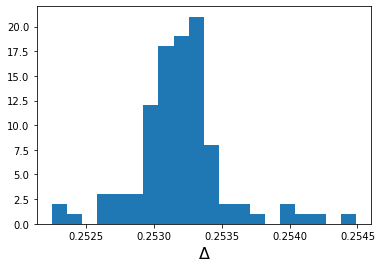

(array([ 1.,  1.,  5.,  4., 10., 12., 15., 15., 12., 14.,  7.,  0.,  1.,
         0.,  0.,  1.,  0.,  1.,  0.,  1.]),
 array([0.63759914, 0.63902548, 0.64045182, 0.64187815, 0.64330449,
        0.64473083, 0.64615716, 0.6475835 , 0.64900984, 0.65043617,
        0.65186251, 0.65328885, 0.65471518, 0.65614152, 0.65756786,
        0.65899419, 0.66042053, 0.66184687, 0.6632732 , 0.66469954,
        0.66612588]),
 <BarContainer object of 20 artists>)

Text(0.5, 0, '$\\chi^2$')

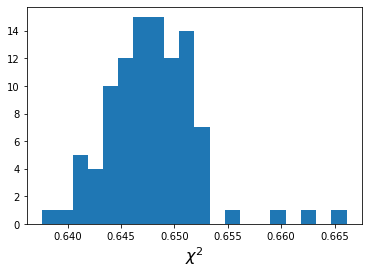

In [14]:
%time

x_min=del_r_dec[fit_start]
x_max=del_r_dec[fit_end]
print("fit_min=%f, fit_max=%f" %(x_min,x_max ))

r_min=float(VOL)/(2*np.pi) *np.arccos(1-x_min)
r_max=float(VOL)/(2*np.pi) *np.arccos(1-x_max)
print("fit_min=%f, fit_max=%f" %(r_min,r_max ))


polyfit=1
if polyfit:
    popsR=pops.reshape(len(pops)//3,3)

    df3=pd.DataFrame(popsR)
    df3.to_csv("indiv_polyfit_T"+T,header=False,index=False,sep='\t')

    final_pops=np.mean(popsR,axis=0) # 0 for columnwise mean
    print("fits poly",final_pops)

    final_pops_err=np.apply_along_axis(jackknife_utilities.jack_error,0,popsR) # you need jackknife error as the
                                       # data here coming from jackknife
    print("errors", final_pops_err)
    chisqr_final=np.mean(chisqr_arr)
    print("chisqr", chisqr_final)
    
    df=pd.DataFrame([[float(T),*final_pops,*final_pops_err,chisqr_final,x_min,x_max,int(r_min),int(r_max),fit_start,fit_end]])
    df.to_csv("fit_info.vol"+VOL,header=False,index=False,sep='\t',mode='a')
    
    df2=pd.DataFrame([[float(T),final_pops[2],final_pops_err[2],chisqr_final,int(r_min),int(r_max),fit_start,fit_end]])
    df2.to_csv("fit.T"+T,header=False,index=False,sep='\t',mode='a')
    
    #### plot distributions
    plt.hist(popsR[:,2],bins=20)
    plt.xlabel(r'$\Delta$',fontsize=16)
    plt.savefig("poly.T"+T+".delta_hist.png",bbox_inches='tight')
    plt.show()
    plt.close()

    plt.hist(chisqr_arr,bins=20)
    plt.xlabel(r'$\chi^2$',fontsize=16)
    plt.savefig("poly.T"+T+".chisqr_hist.png",bbox_inches='tight')
    plt.show()
    plt.close()



###############################################################################

exp_plot=0
if exp_plot:
    pops3R=pops3.reshape(len(pops3)//3,3)

    df4=pd.DataFrame(pops3R)
    df4.to_csv("indiv_expfit_T"+T,header=False,index=False,sep='\t')



    final_pops3=np.mean(pops3R,axis=0) # 0 for columnwise mean
    print("fits exp",final_pops3)

    final_pops3_err=np.apply_along_axis(jackknife_utilities.jack_error,0,pops3R) # you need jackknife error as the
                                       # data here coming from jackknife
    
    print("errors", final_pops3_err)
    chisqr3_final=np.mean(chisqr_arr3)
    print("chisqr", chisqr3_final)
    
    df=pd.DataFrame([[float(T),*final_pops,*final_pops_err,chisqr_final,x_min,x_max,int(r_min),int(r_max),fit_start,fit_end]])
    df.to_csv("fit_info.vol"+VOL,header=False,index=False,sep='\t',mode='a')
    
    plt.hist(pops3R[:,2],bins=20)
    plt.xlabel(r'$m$',fontsize=16)
    plt.savefig("exp.T"+T+".m_hist.png",bbox_inches='tight')
    plt.show()

    plt.close()

    plt.hist(chisqr_arr3,bins=20)
    plt.xlabel(r'$\chi^2$',fontsize=16)
    plt.savefig("exp.T"+T+".chisqr_hist.png",bbox_inches='tight')
    plt.show()
    plt.close()
#######################################################################


In [15]:
fit_param_total=3
dof=fit_end-fit_start-fit_param_total
#dof=17
#chisqr_final=0.6778
chisqr_final*dof

1-chi2.cdf(chisqr_final*dof,dof)
chi2.sf(chisqr_final*dof,dof,loc=0, scale=1)


7.774605626210372

0.8024868404574266

0.8024868404574266

<ErrorbarContainer object of 3 artists>

Text(0.5, 0, '$(1-\\cos(\\theta) ) $')

Text(0.4, 0.85, '$\\mathrm{T}$=2.7')

Text(0, 0.5, '$ C(\\theta)$')

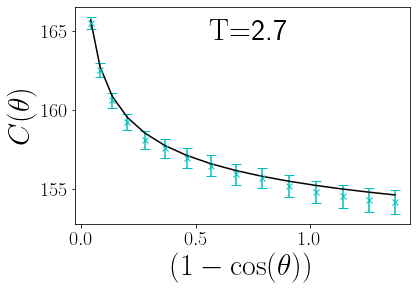

In [23]:
##fit-1: only fitted part regular scale

plt.rc('text',usetex=True)
fig, ax = plt.subplots(facecolor="w")
ax.tick_params(axis='both', which='major', labelsize=20)
plt.errorbar(del_r_dec[fit_start:fit_end],jkavg[fit_start:fit_end],yerr=jkerr[fit_start:fit_end],marker='x',c='c',ls='none',capsize=5)
plt.plot(del_r_dec[fit_start:fit_end],func1(del_r_dec[fit_start:fit_end],*final_pops),'k',label='poly')

#plt.plot(del_r_dec[fit_start:fit_end],func3(del_r_dec[fit_start:fit_end],*final_pops3),'r',label='exp')
#plt.legend(loc='best')
plt.xlabel(r'$(1-\cos(\theta) ) $', fontsize=30)
plt.ticklabel_format(useOffset=False)
#plt.ylabel(r'$ \log C(\theta)$', fontsize=16)
plt.annotate(r'$\mathrm{T}$=%s' %(T), xy=(0.4,0.85),xycoords='axes fraction',fontsize=30 )
plt.ylabel(r'$ C(\theta)$', fontsize=30)

#plt.xlim([0.2,1])
#plt.ylim([0.05,0.08])
plt.savefig("both.fit1_regularscale.T."+T+".png",bbox_inches='tight')
plt.show()
plt.close()

<ErrorbarContainer object of 3 artists>

Text(0.5, 0, '$(1-\\cos(\\theta) ) $')

Text(0.4, 0.9, '$\\mathrm{T}$=2.7')

Text(0, 0.5, '$ C(\\theta)$')

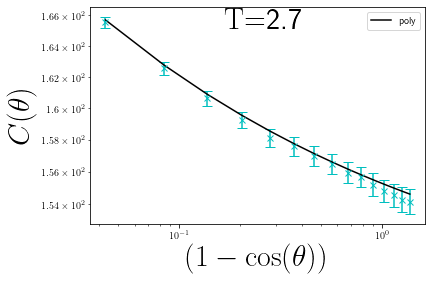

In [28]:
##fit-2: only fitted part log-scale
fig = plt.figure(facecolor="w")
plt.errorbar(del_r_dec[fit_start:fit_end],jkavg[fit_start:fit_end],yerr=jkerr[fit_start:fit_end],marker='x',c='c',ls='none',capsize=5)
plt.plot(del_r_dec[fit_start:fit_end],func1(del_r_dec[fit_start:fit_end],*final_pops),'k',label='poly')
#plt.plot(del_r_dec[fit_start:fit_end],func3(del_r_dec[fit_start:fit_end],*final_pops3),'r',label='exp')
plt.legend(loc='best')
plt.xlabel(r'$(1-\cos(\theta) ) $', fontsize=30)
plt.ticklabel_format(useOffset=False)
#plt.ylabel(r'$ \log C(\theta)$', fontsize=16)
plt.annotate(r'$\mathrm{T}$=%s' %(T), xy=(0.4,0.9),xycoords='axes fraction',fontsize=30 )
plt.ylabel(r'$ C(\theta)$', fontsize=30)
plt.xscale('log')
plt.yscale('log')
#plt.xlim([0.2,1])
#plt.ylim([0.05,0.08])
plt.savefig("both.fit2_logscale.T."+T+".png",bbox_inches='tight')
plt.show()
plt.close()

<ErrorbarContainer object of 3 artists>

Text(0.5, 0, '$(1-\\cos(\\theta) ) $')

Text(0.4, 0.9, '$\\mathrm{T}$=2.7')

Text(0, 0.5, '$ C(\\theta)$')

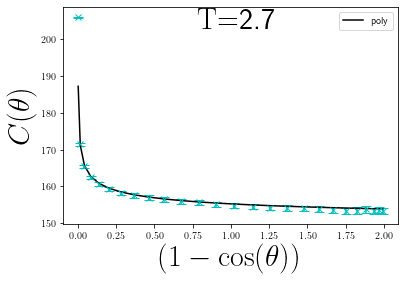

In [29]:
#fit3: complete range--regular scale
fig = plt.figure(facecolor="w")
plt.errorbar(del_r_dec,jkavg,yerr=jkerr,marker='x',c='c',ls='none',capsize=5)
plt.plot(del_r_dec,func1(del_r_dec,*final_pops),'k',label='poly')
#plt.plot(del_r_dec,func3(del_r_dec,*final_pops3),'r',label='exp')
plt.legend(loc='best')
plt.xlabel(r'$(1-\cos(\theta) ) $', fontsize=30)
plt.ticklabel_format(useOffset=False)
#plt.ylabel(r'$ \log C(\theta)$', fontsize=16)
plt.annotate(r'$\mathrm{T}$=%s' %(T), xy=(0.4,0.9),xycoords='axes fraction',fontsize=30 )
plt.ylabel(r'$ C(\theta)$', fontsize=30)
#plt.xscale('log')
#plt.yscale('log')
plt.savefig("both.fit3_regularscale.T."+T+".png",bbox_inches='tight')
plt.show()
plt.close()

<ErrorbarContainer object of 3 artists>

Text(0.5, 0, '$(1-\\cos(\\theta) ) $')

Text(0.4, 0.9, '$\\mathrm{T}$=2.7')

Text(0, 0.5, '$ C(\\theta)$')

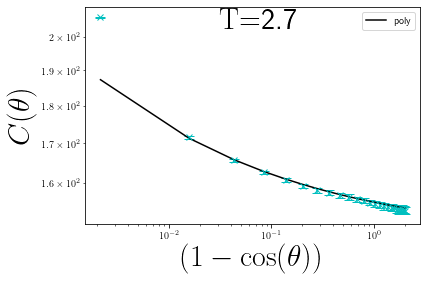

In [30]:
#fit 4: complete range---log scale
fig = plt.figure(facecolor="w")
plt.errorbar(del_r_dec,jkavg,yerr=jkerr,marker='x',c='c',ls='none',capsize=5)
plt.plot(del_r_dec,func1(del_r_dec,*final_pops),'k',label='poly')
#plt.plot(del_r_dec,func3(del_r_dec,*final_pops3),'r',label='exp')
plt.legend(loc='best')
plt.xlabel(r'$(1-\cos(\theta) ) $', fontsize=30)
plt.ticklabel_format(useOffset=False)
#plt.ylabel(r'$ \log C(\theta)$', fontsize=16)
plt.annotate(r'$\mathrm{T}$=%s' %(T), xy=(0.4,0.9),xycoords='axes fraction',fontsize=30 )
plt.ylabel(r'$ C(\theta)$', fontsize=30)
plt.xscale('log')
plt.yscale('log')
plt.savefig("both.fit4_logscale.T."+T+".png",bbox_inches='tight')
plt.show()
plt.close()

<ErrorbarContainer object of 3 artists>

Text(0.5, 0, '$(1-\\cos(\\theta) ) $')

Text(0.4, 0.85, '$\\mathrm{T}$=2.7')

Text(0, 0.5, '$ C(\\theta)$')

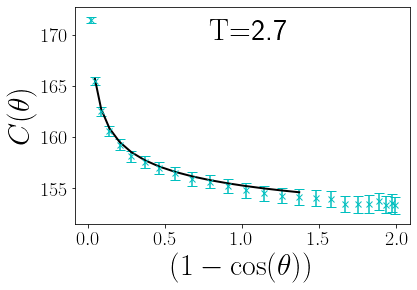

In [27]:
#fit5
plt.rc('text',usetex=True)
fig, ax = plt.subplots(facecolor="w")
ax.tick_params(axis='both', which='major', labelsize=20)
lr=len(del_r_dec)
plt.errorbar(del_r_dec[1:lr],jkavg[1:lr],yerr=jkerr[1:lr],marker='x',c='c',ls='none',capsize=5)
plt.plot(del_r_dec[fit_start:fit_end],func1(del_r_dec[fit_start:fit_end],*final_pops),'k',lw=2,label='poly')
#plt.plot(del_r_dec[fit_start:fit_end],func3(del_r_dec[fit_start:fit_end],*final_pops3),'r',lw=2,label='exp')
#plt.legend(loc='best')
plt.xlabel(r'$(1-\cos(\theta) ) $', fontsize=30)
#plt.grid('on')
plt.ticklabel_format(useOffset=False)
#plt.ylabel(r'$ \log C(\theta)$', fontsize=16)
plt.annotate(r'$\mathrm{T}$=%s' %(T), xy=(0.4,0.85),xycoords='axes fraction',fontsize=30 )
plt.ylabel(r'$ C(\theta)$', fontsize=30)
#plt.xscale('log')
#plt.yscale('log')
plt.savefig("both.fit5_regular.T."+T+".png",bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
#fit6
fig = plt.figure(facecolor="w")
lr=len(del_r_dec)
plt.errorbar(del_r_dec[1:lr],jkavg[1:lr],yerr=jkerr[1:lr],marker='x',c='c',ls='none',capsize=5)
plt.plot(del_r_dec[fit_start:fit_end],func1(del_r_dec[fit_start:fit_end],*final_pops),'k',lw=2,label='poly')
#plt.plot(del_r_dec[fit_start:fit_end],func3(del_r_dec[fit_start:fit_end],*final_pops3),'r',lw=2,label='exp')
plt.legend(loc='best')
plt.xlabel(r'$(1-\cos(\theta) ) $', fontsize=30)
plt.ticklabel_format(useOffset=False)
#plt.ylabel(r'$ \log C(\theta)$', fontsize=16)
plt.annotate(r'$\mathrm{T}$=%s' %(T), xy=(0.4,0.9),xycoords='axes fraction',fontsize=30 )
plt.ylabel(r'$ C(\theta)$', fontsize=30)
plt.xscale('log')
plt.yscale('log')
plt.savefig("both.fit6_logscale.T."+T+".png",bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
np.exp(-0.01*65)
1/(1-np.cos(65/532*np.pi) )**(-0.15)

In [ ]:
config_length